In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rc('font', family='serif')

## Projections

In [2]:
start_year = 1750
last_historical_year = 2010  # 2019
end_year = 2100

years = np.arange(start_year, end_year+1)
T_forecast_years = np.arange(last_historical_year, end_year+1)
T_forecast_length = end_year - last_historical_year + 1

## Create g as a function of T

In [275]:
# g_2019 = 0.03
g_0 = 0.02
# g_grad = 0.0003
g_grad = 0.0026
# g_grad = 0.0005
# g_grad = 0.0045
# g_grad = 0.0004
W_0 = 80

# g = g_2019 - g_grad*(T_forecast[:-1]-T_2019)**1
# g_prime = g_2019 - g_grad*(T_forecast_perturbed[:-1]-T_2019)**1
# plt.plot(T_forecast[:-1], g)

# plt.xlabel("T")
# plt.ylabel("g")

W is independent

In [276]:
W_const = [W_0]
W_previous_year = W_const[0]

for i in range(len(T_forecast_years) - 1):
    W_this_year = W_previous_year*np.exp(g_0)
#     W_this_year = W_previous_year*np.exp(g_2019 - g_grad*(SSP2_T[i])**2)
    W_const.append(W_this_year)
    W_previous_year = W_this_year

W_const = np.asarray(W_const)

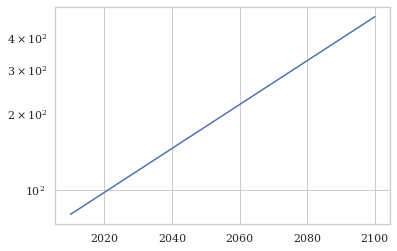

In [277]:
plt.plot(T_forecast_years, W_const)
plt.yscale("log")

W is not independent

In [278]:
## temperature forecasts

T_1pt5 = np.linspace(0, 0.6, T_forecast_length)
T_2pt0 = np.linspace(0, 1.1, T_forecast_length)

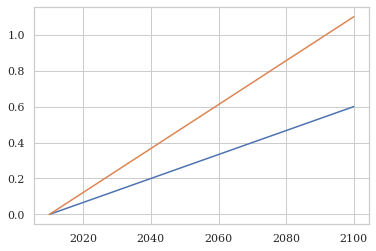

In [279]:
plt.plot(T_forecast_years, T_1pt5)
plt.plot(T_forecast_years, T_2pt0)

In [280]:
## 1.5 GDP projection

W_1pt5 = [W_0]
W_previous_year = W_const[0]

for i in range(len(T_forecast_years) - 1):
    W_this_year = W_previous_year*np.exp(g_0 - g_grad*(T_1pt5[i]))
    W_1pt5.append(W_this_year)
    W_previous_year = W_this_year

W_1pt5 = np.asarray(W_1pt5)

In [281]:
## 1.5 GDP projection

W_2pt0 = [W_0]
W_previous_year = W_const[0]

for i in range(len(T_forecast_years) - 1):
    W_this_year = W_previous_year*np.exp(g_0 - g_grad*(T_2pt0[i]))
    W_2pt0.append(W_this_year)
    W_previous_year = W_this_year

W_2pt0 = np.asarray(W_2pt0)

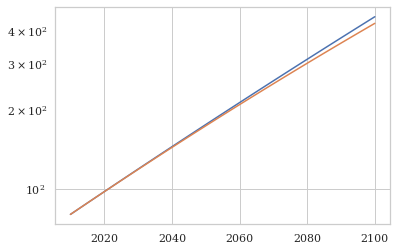

In [282]:
plt.plot(T_forecast_years, W_1pt5)
plt.plot(T_forecast_years, W_2pt0)
plt.yscale("log")

In [283]:
percentage_change_1pt5 = (W_1pt5-W_const)*100/W_const
percentage_change_2pt0 = (W_2pt0-W_const)*100/W_const

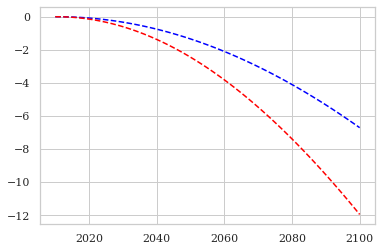

In [284]:
plt.plot(T_forecast_years, percentage_change_1pt5, label="1.5 Degrees Celsius", color="blue", linestyle='dashed')
plt.plot(T_forecast_years, percentage_change_2pt0, label="2 Degrees Celsius", color="red", linestyle='dashed')

Add Pretis Bounds

In [285]:
df_1pt5_middle = pd.read_csv("Pretis_1pt5_middle.csv", header=None)
df_1pt5_upper = pd.read_csv("Pretis_1pt5_upper.csv", header=None)
df_1pt5_lower = pd.read_csv("Pretis_1pt5_lower.csv", header=None)

In [286]:
df_2pt0_middle = pd.read_csv("Pretis_2pt0_middle.csv", header=None)
df_2pt0_upper = pd.read_csv("Pretis_2pt0_upper.csv", header=None)
df_2pt0_lower = pd.read_csv("Pretis_2pt0_lower.csv", header=None)

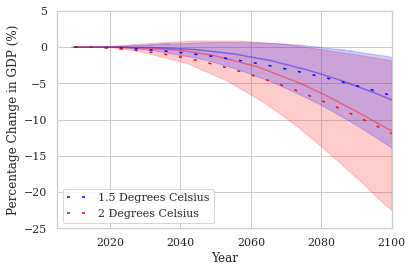

In [289]:
fig = plt.figure()
# plt.plot(df_1pt5_upper[0], df_1pt5_upper[1], color="orange")
plt.plot(df_1pt5_middle[0], df_1pt5_middle[1], color="blue", alpha=0.4)
plt.plot(df_2pt0_middle[0], df_2pt0_middle[1], color="red", alpha=0.4)
# plt.plot(df_1pt5_lower[0], df_1pt5_lower[1], color="orange")

x1 = np.asarray(df_2pt0_lower[0])
x2 = np.asarray(df_2pt0_upper[0])

y1 = np.asarray(df_2pt0_lower[1])
y2 = np.asarray(df_2pt0_upper[1])
plt.fill(
    np.append(x1, x2[::-1]),
    np.append(y1, y2[::-1]),
    alpha=0.2,
    color="red"
)

x1 = np.asarray(df_1pt5_lower[0])
x2 = np.asarray(df_1pt5_upper[0])

y1 = np.asarray(df_1pt5_lower[1])
y2 = np.asarray(df_1pt5_upper[1])
plt.fill(
    np.append(x1, x2[::-1]),
    np.append(y1, y2[::-1]),
    alpha=0.2,
    color="blue"
)

plt.plot(T_forecast_years, percentage_change_1pt5, label="1.5 Degrees Celsius", color="blue", dashes=(2, 8))
plt.plot(T_forecast_years, percentage_change_2pt0, label="2 Degrees Celsius", color="red", dashes=(2, 8))

plt.xlabel("Year")
plt.ylabel("Percentage Change in GDP (%)")
plt.xlim(2005, 2100)
plt.ylim(-25, 5)
plt.legend()

fig.savefig('../peak_warming_calculator/figures/Pretis.png', bbox_inches='tight', dpi = 300)